# Machine Learning Case study assesment
Analysis on Population and GDP data for respective countries of the world.
This project revolves around two data sets Population and GDP taken up from the world bank database.
To begin with this assignment we store the data files on the system and extract the data to specific location for further processing.
1. Begin with the data processing, importing necessary libraries -

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy import stats
import matplotlib.pyplot as plt

Reading the csv files with pandas
> Since there are two datasets, we create separate data frames for GDP and population data.

gdp_data = is the dataframe containing the complete data about GDP of enlisted countries

pop_data = is the dataframe containing the complete data about the population of enlisted countries

> All the tables have country code as the common primary key to link correlation between these tables.

gdp_metadata = has the region and income group labels data for all the enlisting countries

pop_metadata = has the region and income group labels data for all the enlisting countries

> On reading the data we need to skip the first four rows since these are blank data with timestamp, hence the read csv command is accompanied with the skiprows = 4 command.

> To read and run these files on your machine, the file path must be replaced with the unique path on designated system.

In [2]:
path1 = r"C:\Users\HP\OneDrive\Desktop\ML Project\API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv"
gdp_data = pd.read_csv(path1, encoding="latin-1", skiprows=4)          
#encoding in read csv file helps to locate the file across all the directories, it searches the file name provided.

In [3]:
path2 = r"C:\Users\HP\OneDrive\Desktop\ML Project\API_SP.POP.TOTL_DS2_en_csv_v2_5454896.csv"
pop_data = pd.read_csv(path2, encoding="latin-1", skiprows=4)
# simple r"file_path" is used to remove the unicode error and read the file unique path

In [4]:
path3 = r"C:\Users\HP\OneDrive\Desktop\ML Project\Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5454986.csv"
gdp_metadata = pd.read_csv(path3, encoding="latin-1",skiprows=0)

In [5]:
path4 = r"C:\Users\HP\OneDrive\Desktop\ML Project\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_5454896.csv"
pop_metadata = pd.read_csv(path4, encoding="latin-1",skiprows=0)

In [6]:
# To check the data frame and get the basic understanding about the rows and columns structure of the data
gdp_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,...,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11,NaN,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,NaN,NaN


Going through the data frame we understand-
1. It has a set of countries as index and has the years about the GDP figures in the columns
2. Country code is a unique code for every index and can be matched at other tables for reference data matching/merging
3. Indicator name column indicates about the data features that the values are suggesting wither GDP or Pupulation
4. the data is a time continious data on yearly beginning from the year 1960 till the year 2022
5. Column label year 2022 has all the indices as null, so we decide to drop the column
6. Similarly the column label indicator code and unnamed:67 and unamed: 5 from respective datasets are found to be empty and redundant, so we decide to drop these columns
7. Rename the country name column after removing abstract symbols from the label
8. A lot of NaN or null values can be seen in the data set
9. The structure of the dataframe is of 266rows and 68 columns for complete data both for the GDP and population data

In [7]:
# inplace flag is set to true to make these changes applicable to the original main data set
pop_metadata.rename(columns={'ï»¿"Country Code"' : "Country Code"}, inplace=True)
gdp_metadata.rename(columns={'ï»¿"Country Code"' : "Country Code"}, inplace=True)

In [8]:
pop_metadata.drop(columns=["Unnamed: 5"], inplace=True)
gdp_metadata.drop(columns=["Unnamed: 5"], inplace=True)

In [9]:
pop_data.drop(columns=["Indicator Code","2022","Unnamed: 67"], inplace=True)
gdp_data.drop(columns=["Indicator Code","2022","Unnamed: 67"], inplace=True)

> We slice the GDP data to understand the size and dimensions of the numeric values and the data of the index countries
> It was found that there are 266rows and 62 columns data containing the year wise GDP data

In [10]:
gdp_data.iloc[:,3:]
# iloc is used to slice the data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,...,9.720022e+11,9.826771e+11,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12
2,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,...,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,...,7.360399e+11,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09
262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540132e+10,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN
263,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,1.925699e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.041597e+11,3.885320e+11,3.376197e+11,4.190150e+11
264,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,1.605857e+09,1.965714e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10


In [11]:
## We create a copy of these data sets, just in case we have a need to retrieve or call 
#from the original unaltered data anywhere in the future
data1=gdp_data.copy()
data2=pop_data.copy()

## Data Quality of the Population and GDP datasets
1. As we have seen earlier, there are a lot of null values in the dataset
2. To understand the data completeness we need to evaluate the null values in the data with respect to every country
3. Each index has a unique country, so we need to get the sum of null values in a row to arrive at the % of data completeness
4. We use the lambda function to sum all the null values in each row
5. Then we divide this value by the number of years to get the percentage of emptiness of a row
6. We reduce this value from 1 to get the completeness of values in a row
7. Add this as a column feature named as Data completeness
8. Same is repeated for the GDP as well as the Population dataset

In [12]:
## iloc is used to slice the data frame and work only the column features containing the values 
gdp_data["Data completeness%"]= (1-(gdp_data.iloc[:,3::].apply(lambda x: x.isna().sum(),axis=1))/62)*100
pop_data["Data completeness%"]= (1-(pop_data.iloc[:,3::].apply(lambda x: x.isna().sum(),axis=1))/62)*100

In [13]:
gdp_data.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Data completeness%
0,Aruba,ABW,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,58.064516
1,Africa Eastern and Southern,AFE,GDP (current US$),2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,...,9.826771e+11,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12,100.000000
2,Afghanistan,AFG,GDP (current US$),5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10,67.741935
3,Africa Western and Central,AFW,GDP (current US$),1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,...,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11,100.000000
4,Angola,AGO,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,67.741935


## Bar chart to describe the data completeness for GDP and Population
1. We identify the top twenty countries having the data completeness
2. We create a figure from the data feature data completeness for these top twenty countries
3. To get the countries annotations we iterate through a for loop to get the annotation label values
4. Assign a tittle to the bar chart
5. Assign labels to the x-axis and y-axis
6. The same operation on the gdp data as well as the population data
7. After we have identitfied the top countries having the data completeness we can see there are most of the countries are complete, but same time we can also find the countries having the lowest data complteness by replacing the largest command with the smallest

In [14]:
## get the gdp data for top 20 countries based on the completeness
top_20 = gdp_data.nlargest(20,'Data completeness%')

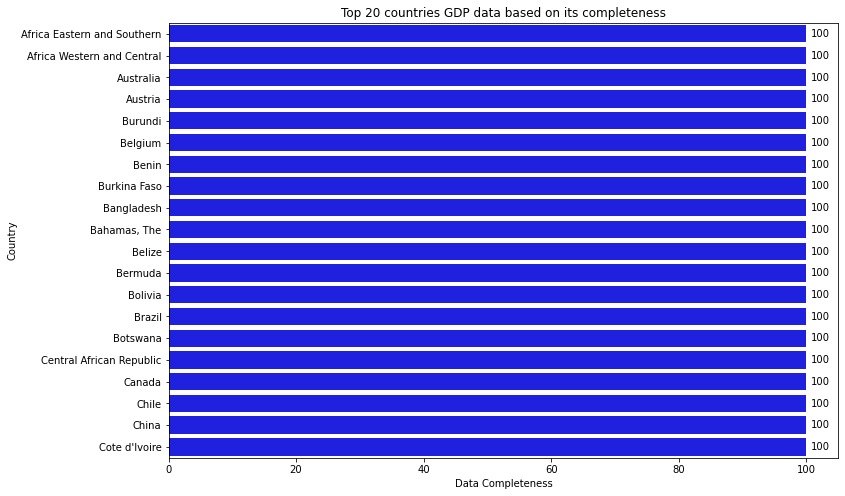

<Figure size 432x288 with 0 Axes>

In [15]:
## To create a figure object
plt.figure(figsize=(12,8))

## To create a figure bar plot
ax = sns.barplot(x="Data completeness%", y='Country Name',data=top_20,color='blue')

## to add annotations on the bar chart

for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

## To add a tittle to the chart
plt.title("Top 20 countries GDP data based on its completeness")
## Assign labels to the x-axis and the y-axis
plt.xlabel('Data Completeness')
plt.ylabel('Country')
# to display the plot chart
plt.show()
## to save the chart
plt.savefig(f"Top 20 countries GDP data based on its completeness.jpg", dpi =300)

In [16]:
## get the population data for top 20 countries based on the completeness
top_20 = pop_data.nlargest(20,'Data completeness%')

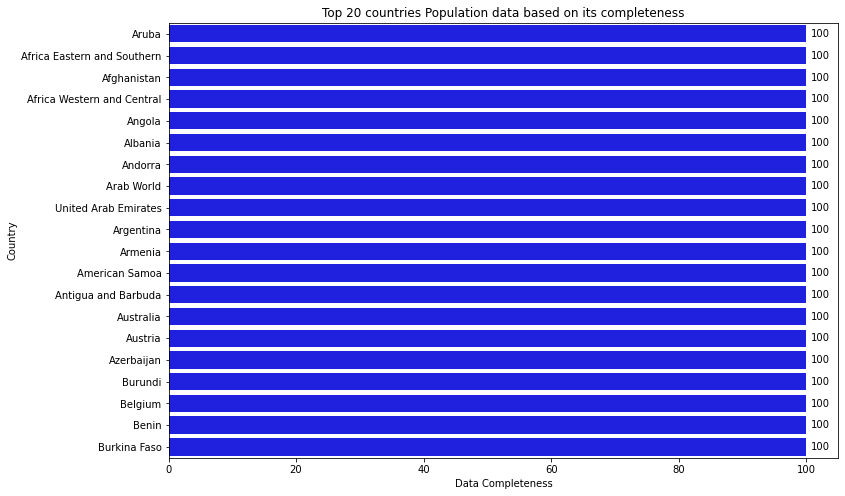

<Figure size 432x288 with 0 Axes>

In [17]:
## To create a figure object
plt.figure(figsize=(12,8))

## To create a figure bar plot
ax = sns.barplot(x="Data completeness%", y='Country Name',data=top_20,color='blue')

## to add annotations on the bar chart

for p in ax.patches:
    ax.annotate("%.f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

## To add a tittle to the chart
plt.title("Top 20 countries Population data based on its completeness")
## Assign labels to the x-axis and the y-axis
plt.xlabel('Data Completeness')
plt.ylabel('Country')

## to display the plot chart
plt.show()
## to save the chart
plt.savefig(f"Top 20 countries Population data based on its completeness.jpg", dpi =300)

1. Also, to have an overview about the complete data set completeness we can plot a histogram to count the of data completeness
2. From this GDP histogram we can clearly see that around 80% of the data is complete and lies in the 100% completeness chart plot
3. We can also see there are many data points which lie in lesser data completeness region, all these account for around 20% of the indexes
4. Similarly, we plot the data completeness chart for the population data set, where we see almost 98% of the data is complete and there are very few points with null values.
5. These histigrams describe an overview about the data quality , as we can see the population data is much better quality than the GDP data.

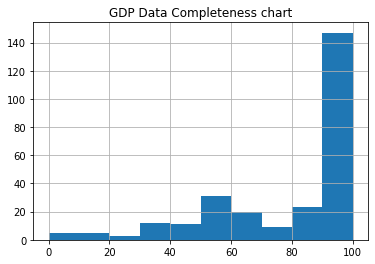

In [18]:
gdp_data["Data completeness%"].hist()
## To add a tittle to the chart
plt.title("GDP Data Completeness chart")
## to save the chart
plt.savefig(f"GDP Data Completeness chart.jpg", dpi =300)

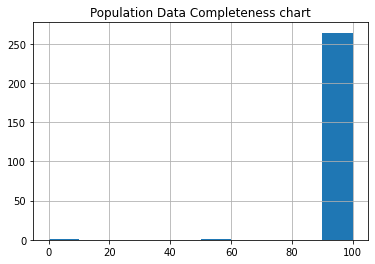

In [19]:
pop_data["Data completeness%"].hist()
## To add a tittle to the chart
plt.title("Population Data Completeness chart")
## to save the chart
plt.savefig(f"Population Data Completeness chart.jpg", dpi =300)

## To calculate the summary statistics for each year and export the output to separate file

1. We need to find out the region wise summary statistics, for that we need to merge the population data file and the labels data file
2. This creates a new merged data set that countains the complete population data joined with the region and income labels from the meta data file, the join is performed using the country code labels which are common to both these files.
3. First , To work on the data , we first need to do the preprocessing on the data and remove the nullvalues , so that smooth fuctionality can be obtained after removing the Nan values

### To group by these countries based on the region, we see the region label is available in the meta data table
1. We need to merge these two tables and then perform a group by region on the merged table data
2. Before performing any merge operation we must remove the null values from the data set
3. We iterate ove a for loop in the grouped data and print summary statistics using the descibe function from the library
4. We store the data in a separat csv file to present the output on a separate file

In [20]:
# We check the columns of the meta data file, and see the regions feature is available, we can merge this file witht the main data and group by the feature region to generate the summary statistics
pop_metadata.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

In [21]:
## We need to fill all the null values with the mean of that row, to ensure smooth fuctioning of the function
pop_data.iloc[:,3:-1] = pop_data.iloc[:,3:-1].apply(lambda x:x.fillna(x.mean()),axis=1)

In [22]:
## Merge the population data values with the meta data table and create a new data frame named as merge_population_data
merge_pop_data = pd.merge(
    #First data set to merge
    pop_data,
    #Second data set to merge with the first one
    pop_metadata,
    # method of joining these data set
    how="left",
    # with reference to the country code label common to both the data frames
    on="Country Code",
    copy=True,
    indicator=False,
    validate=None,
)

In [23]:
## We apply the group by fuction to create the group according to the region in the merged dataset
grouped_data = merge_pop_data.groupby("Region")

In [24]:
## We iterate through for loop in the grouped data to print the summary statistics using the describe function
for i,j  in grouped_data:
    print(i) ## Prints over every region, we see there are seven regions to iterate over
    print((j.iloc[:,3:-5]).apply(lambda x:x.describe(),axis=0))
    ## For every jth iteration, it calculates and prints the summary statistics for each year

East Asia & Pacific
               1960          1961          1962          1963          1964  \
count  3.700000e+01  3.700000e+01  3.700000e+01  3.700000e+01  3.700000e+01   
mean   2.790897e+07  2.794948e+07  2.832832e+07  2.901505e+07  2.969129e+07   
std    1.101403e+08  1.091003e+08  1.100253e+08  1.127448e+08  1.153792e+08   
min    4.582000e+03  4.753000e+03  4.950000e+03  5.198000e+03  5.484000e+03   
25%    6.742800e+04  6.939100e+04  7.138800e+04  7.344100e+04  7.554400e+04   
50%    4.685730e+05  4.757960e+05  4.833240e+05  4.911170e+05  4.991360e+05   
75%    1.027648e+07  1.048300e+07  1.074200e+07  1.095000e+07  1.116700e+07   
max    6.670700e+08  6.603300e+08  6.657700e+08  6.823350e+08  6.983550e+08   

               1965          1966          1967          1968          1969  \
count  3.700000e+01  3.700000e+01  3.700000e+01  3.700000e+01  3.700000e+01   
mean   3.038587e+07  3.116648e+07  3.192859e+07  3.272185e+07  3.356432e+07   
std    1.181412e+08  1.214451e+

               1960          1961          1962          1963          1964  \
count  8.000000e+00  8.000000e+00  8.000000e+00  8.000000e+00  8.000000e+00   
mean   7.141038e+07  7.311044e+07  7.485867e+07  7.665369e+07  7.849292e+07   
std    1.525998e+08  1.561545e+08  1.598026e+08  1.635303e+08  1.673300e+08   
min    9.165000e+04  9.395200e+04  9.633200e+04  9.877500e+04  1.012410e+05   
25%    6.522166e+06  6.649373e+06  6.785140e+06  6.928166e+06  7.078496e+06   
50%    1.002121e+07  1.023839e+07  1.046145e+07  1.069012e+07  1.092640e+07   
75%    4.706478e+07  4.826638e+07  4.948680e+07  5.076732e+07  5.210806e+07   
max    4.459546e+08  4.563519e+08  4.670242e+08  4.779336e+08  4.890593e+08   

               1965          1966          1967          1968          1969  \
count  8.000000e+00  8.000000e+00  8.000000e+00  8.000000e+00  8.000000e+00   
mean   8.034058e+07  8.218287e+07  8.406106e+07  8.601303e+07  8.802607e+07   
std    1.711009e+08  1.748061e+08  1.785478e+08  1.

In [25]:
## Storing the output in a separate file
## We first create a new file with name Region wise statistics
file = open("Region_wise_Stats.csv","w")

file.write("Region_wise_Statistics \n")
## Giving a tittle to the file data

## We run the for loop and print the description statistics inside the file with every iteration summary statistics gets printed in the output file
for i,j  in grouped_data:
    file.write(i)
    ## write the regions in the file
    file.write(str((j.iloc[:,3:-5]).apply(lambda x:x.describe(),axis=0)))
    ## write the summary statistics in the file for every region

file.close()

## Using the close() to change file access modes

In [26]:
print(grouped_data) 

## Region wise box plot for population data points in the most recent year

> We create a box plot figure for the most recent year, grouped data region wise and column year wise is plotted on these box plot vertically
> The population data available for the most recent year is 2021 so we shall generate the box plot region wise for the year 2021

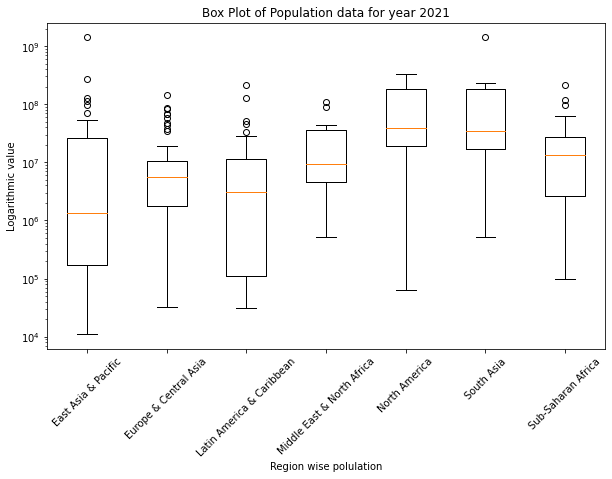

In [27]:
## Create a figure using matplot library
fig, ax = plt.subplots(figsize=(10, 6))
## Select the most recent year or the year for which the region wise box plot needs to be created
columns_to_plot = ["2021"]

## Iterate over a for loop to generate the region wise data points grouped according to the year selected
## We have seven regions list, so we create seven groupes to print a subplot for every group
for column in columns_to_plot:
    group1 = grouped_data.get_group("East Asia & Pacific")[column]
    group2 = grouped_data.get_group("Europe & Central Asia")[column]
    group3 = grouped_data.get_group("Latin America & Caribbean")[column]
    group4 = grouped_data.get_group("Middle East & North Africa")[column]
    group5 = grouped_data.get_group("North America")[column]
    group6 = grouped_data.get_group("South Asia")[column]
    group7 = grouped_data.get_group("Sub-Saharan Africa")[column]

    ## collect all the data poinnts to plot the figure
    all_data = [group1,group2,group3,group4,group5,group6,group7]
    ## print labels for each group
    ax.boxplot(all_data, labels=["East Asia & Pacific", "Europe & Central Asia","Latin America & Caribbean","Middle East & North Africa","North America","South Asia","Sub-Saharan Africa"])
    ## set tittle for the group
    ax.set_title(f"Box Plot of Population data for year {column}")
    ## Label the x-axis and the y-axis
    ax.set_xlabel("Region wise polulation")
    ax.set_ylabel("Logarithmic value")
    ## Transform the values to logarithmic scale , to make the box plot more clearly visible and presentable
    ax.semilogy()

    ## Rotate the x-axis labels to 45 degree to make the label text visible to read properly(avoid overlapping text)
    plt.xticks(rotation=45)
    ## Save the plot to a separate file in jpeg format
    plt.savefig(f"Box Plot of Population data for year.jpg", dpi =300)
    ## Display the plot
    plt.show()

## Region wise box plot for population data points in the most recent 4 years

> The box plot can be plotted region wise for the most recent four years also.

> Below have been created a separate box plot for each region depicting the data for the most recent four years

For each region group a data list has been sliced from the grouped data to plot the most recent trend of yearwise population for each region

In [79]:
#grouped_data.get_group("Sub-Saharan Africa").iloc[:,-9:-5]
#grouped_data.get_group("Sub-Saharan Africa")["2021"]


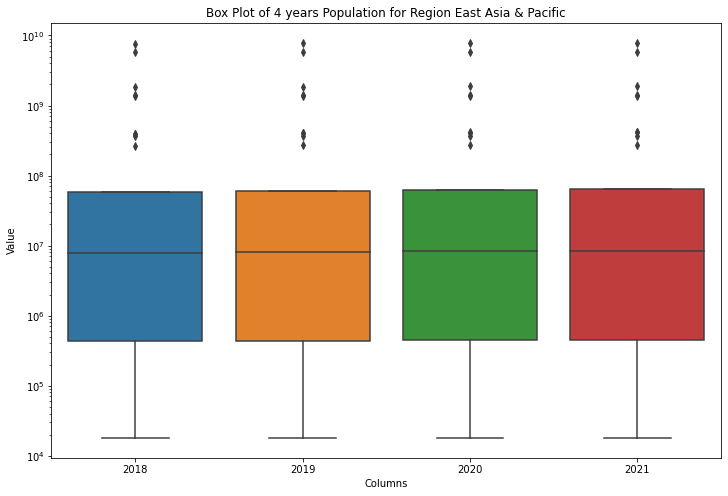

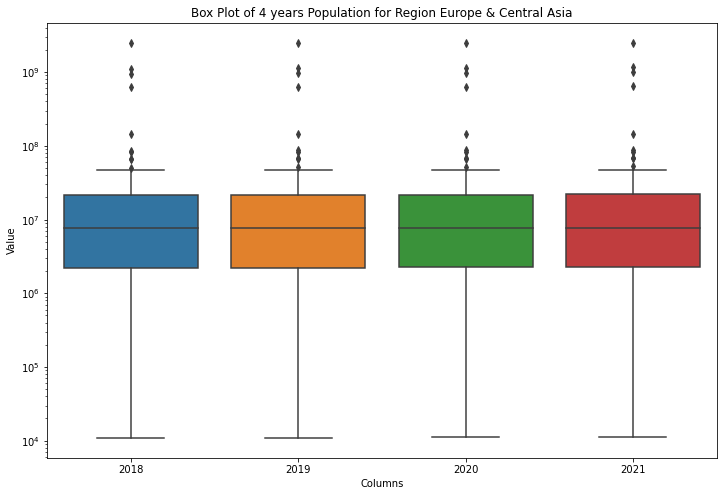

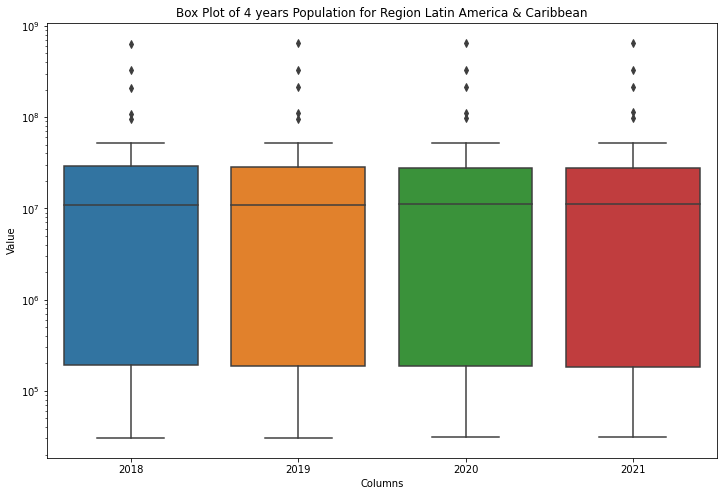

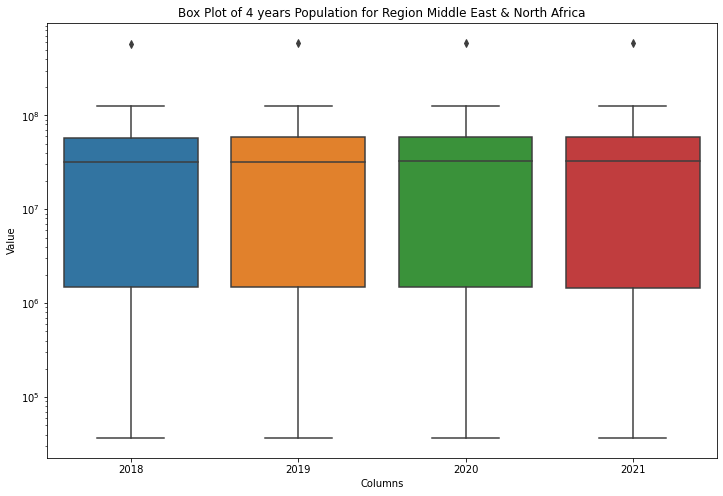

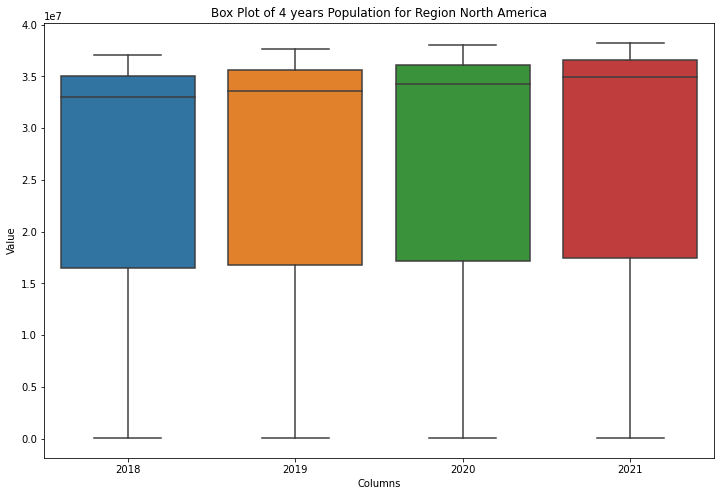

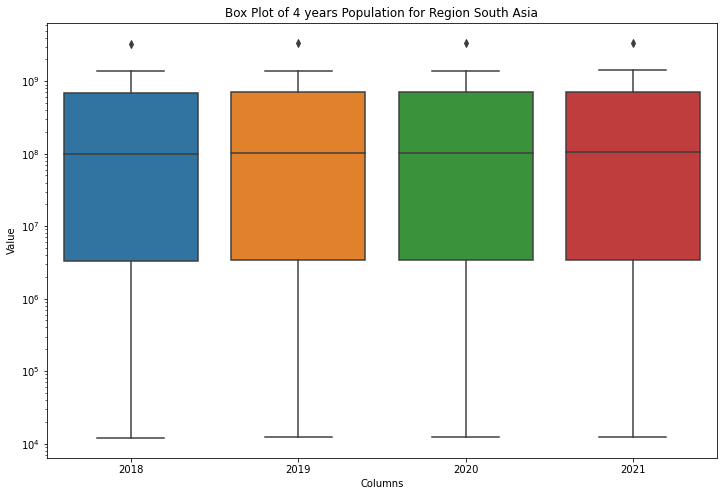

In [80]:
## Region wise data is sliced from the grouped data set and plotted on a box plot
data1 = grouped_data.get_group("East Asia & Pacific").iloc[:,-9:-5]
## Figure is generated
plt.figure(figsize=(12, 8))
## Region wise data is provided for the seaborn library
sns.boxplot(data=data1)
## Tittle and labels are given to the box plot
plt.title("Box Plot of 4 years Population for Region East Asia & Pacific")
plt.xlabel("Columns")
plt.ylabel("Value")
## Log scaling is provided to make the plot more readable
plt.semilogy()
## Plot is saved in a separate file
plt.savefig(f"Box Plot of 4 years Population for Region East Asia & Pacific.jpg", dpi =300)

    # Similarly data is sliced for every region and plotted on box plot with help of seaborn library
## Region wise data is sliced from the grouped data set and plotted on a box plot
data2 = grouped_data.get_group("Europe & Central Asia").iloc[:,-9:-5]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data2)
plt.title("Box Plot of 4 years Population for Region Europe & Central Asia")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.semilogy()
plt.savefig(f"Box Plot of 4 years Population for Region Europe & Central Asia.jpg", dpi =300)

## Region wise data is sliced from the grouped data set and plotted on a box plot
data3 = grouped_data.get_group("Latin America & Caribbean").iloc[:,-9:-5]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data3)
plt.title("Box Plot of 4 years Population for Region Latin America & Caribbean")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.semilogy()
plt.savefig(f"Box Plot of 4 years Population for Region Latin America & Caribbean.jpg", dpi =300)

## Region wise data is sliced from the grouped data set and plotted on a box plot
data4 = grouped_data.get_group("Middle East & North Africa").iloc[:,-9:-5]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data4)
plt.title("Box Plot of 4 years Population for Region Middle East & North Africa")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.semilogy()
plt.savefig(f"Box Plot of 4 years Population for Region Middle East & North Africa.jpg", dpi =300)

## Region wise data is sliced from the grouped data set and plotted on a box plot
data5 = grouped_data.get_group("North America").iloc[:,-9:-5]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data5)
plt.title("Box Plot of 4 years Population for Region North America")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.savefig(f"Box Plot of 4 years Population for Region North America.jpg", dpi =300)

## Region wise data is sliced from the grouped data set and plotted on a box plot
data6 = grouped_data.get_group("South Asia").iloc[:,-9:-5]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data6)
plt.title("Box Plot of 4 years Population for Region South Asia")
plt.xlabel("Columns")
plt.ylabel("Value")
plt.semilogy()
plt.savefig(f"Box Plot of 4 years Population for Region South Asia.jpg", dpi =300)

## Countries having <30% of GDP data complete

In [29]:
# To have a sanity check on the gdp data set
gdp_data.head()

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Data completeness%
0,Aruba,ABW,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,58.064516
1,Africa Eastern and Southern,AFE,GDP (current US$),2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,...,9.826771e+11,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12,100.000000
2,Afghanistan,AFG,GDP (current US$),5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,...,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10,67.741935
3,Africa Western and Central,AFW,GDP (current US$),1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,...,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11,100.000000
4,Angola,AGO,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,67.741935


1. Reporting the list of countries having <30% of data completeness%
2. It is found that thrteen countries are enlisted having less than 30% data completeness
3. These countries indexes are dropped from the dataset
4. We slice the data set for all the numeric values columns and fill the null values with the mean of the rows

### The NaN values are filled with mean, we can also fill the null values using the median values of each row index, usually mean is a preferred choice to fill the null values, while we can also use median in those places where outliers are impacting high, since median imputation does not get effected by the outliers in the data set

In [30]:
## List of countries having country data completeness% <30%
Temp_df = gdp_data[gdp_data["Data completeness%"]<30.00]
Temp_df.to_csv("List of dropped columns from GDP Data set")
Temp_df

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Data completeness%
38,Channel Islands,CHI,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.129032
51,Curacao,CUW,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.039944e+09,3.048436e+09,3.042737e+09,3.014749e+09,3.009497e+09,3.020389e+09,2.995185e+09,2.496175e+09,2.699612e+09,17.741935
52,Cayman Islands,CYM,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.405955e+09,4.563018e+09,4.708337e+09,4.909499e+09,5.166467e+09,5.530378e+09,5.943589e+09,5.608989e+09,5.898450e+09,25.806452
84,Gibraltar,GIB,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
110,Not classified,INX,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
147,St. Martin (French part),MAF,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.729507e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.225806
164,Northern Mariana Islands,MNP,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.720000e+08,8.320000e+08,9.100000e+08,1.230000e+09,1.560000e+09,1.302000e+09,1.182000e+09,NaN,NaN,29.032258
179,Nauru,NRU,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.849184e+07,1.046544e+08,8.652966e+07,9.972339e+07,1.093597e+08,1.240214e+08,1.187241e+08,1.146266e+08,1.332189e+08,19.354839
193,"Korea, Dem. People's Rep.",PRK,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
216,South Sudan,SSD,GDP (current US$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.842647e+10,1.396221e+10,1.199780e+10,NaN,NaN,NaN,NaN,NaN,NaN,12.903226


In [31]:
## We drop these thrteen countries from the data set, we apply flag inplace = True to apply these changes to the complete data set permanently
gdp_data.drop(gdp_data[gdp_data["Data completeness%"]<30.00].index, inplace=True)

In [32]:
## Apply fillna method to all the numeric value columns to fill the null values with the mean of the rows
gdp_data.iloc[:,3:-1] = gdp_data.iloc[:,3:-1].apply(lambda x:x.fillna(x.mean()),axis=1)

In [33]:
## Just to check the sanity for the complete merged data set containing the years data along with the region and income group from the meta data file
merge_pop_data[merge_pop_data["Country Name"].str.contains("India")]

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName
109,India,IND,"Population, total",445954579.0,456351876.0,467024193.0,477933619.0,489059309.0,500114346.0,510992617.0,...,1.354196e+09,1.369003e+09,1.383112e+09,1.396387e+09,1.407564e+09,100.0,South Asia,Lower middle income,The reporting period for national accounts dat...,India


In [34]:
## Column labels in the meta data set
gdp_metadata.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

## Data Preprocessing

> During the merging of data sets , the null values were creating errors during the matrices operations
> Hence the null values are dropped prior to merging these data sets to avoid error at later stages

1. Merging the GDP data witht the GDP meta data set builds dataframe containing the GDP values data with additional columns of the meta data labels for each inex country
2. Data preprocessing is required to remove the null values from these merged data sets
3. We recheck if there are any null values remaining in the GDP as well as population data
3. Find out there are still null values remaining, we need to clean these values

In [35]:
## Merging the gdp data set values with the meta data set
merge_gdp_data = pd.merge(
    ## First dataset
    gdp_data,
    ## Second data set
    gdp_metadata,
    how="left",
    ## With referring to the primary key links these two data frame joining function
    on="Country Code",
    copy=True,
    indicator=False,
    validate=None,
)

In [36]:
## There is still null values remaining in the values columns for the population data set
pop_data.iloc[:,3:-1].isna().sum()

1960    1
1961    1
1962    1
1963    1
1964    1
       ..
2017    1
2018    1
2019    1
2020    1
2021    1
Length: 62, dtype: int64

In [37]:
## We try to filter out the index containing the null values and find a redundant row with all null values
## Since the imputing eas done with the mean, it still remains null because the mean of zero is null
merge_pop_data[merge_pop_data["2021"].isnull()]

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName
110,Not classified,INX,"Population, total",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [38]:
## To check if there are any other such rows with null values
merge_pop_data[merge_pop_data["Data completeness%"]==0.0]

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName
110,Not classified,INX,"Population, total",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [39]:
## Also to check if there are any other such redundant rows in the GDP data set
merge_gdp_data[merge_gdp_data["Country Code"].str.contains("INX")]

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName


In [40]:
## Since the row contains nothing but null values so we decide to remove this row completely from the population data as well as the merged data set
pop_data.drop(110, inplace = True)
merge_pop_data.drop(110, inplace = True)

In [41]:
#To check the gdp data if also contains similar empty string
gdp_data.iloc[:,3:-1].isna().sum().unique()

array([0], dtype=int64)

In [42]:
# To check data cleanliness in the population data set
merge_pop_data[merge_pop_data["1960"].isnull()]

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName


In [43]:
## Checking about the data cleanliness and null values if any
## yes we can see there are null values in the data , there are in the meta data labels, probably will not effect the numeric values computations, so we just ignore them
merge_pop_data.isna().sum()

Country Name            0
Country Code            0
Indicator Name          0
1960                    0
1961                    0
                     ... 
Data completeness%      0
Region                 48
IncomeGroup            49
SpecialNotes          138
TableName               0
Length: 70, dtype: int64

In [44]:
## We can also replace the null values in special notes with zeros just to make it more clean
merge_gdp_data["SpecialNotes"] = merge_gdp_data["SpecialNotes"].fillna(0)

> There are still null values in the data set, these values are not harming the numeric values computation and we can ignore these null values.
> There is a country in the population data set named Venezuela, RB which does not have its income group defined, again these null values are ignored.

In [45]:
# Remaining null values in the income group label of the population data set
merge_pop_data[merge_pop_data["IncomeGroup"].isnull()]

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName
1,Africa Eastern and Southern,AFE,"Population, total",1.306926e+08,1.341692e+08,1.378356e+08,1.416305e+08,1.456060e+08,1.497424e+08,1.539555e+08,...,6.327463e+08,6.497569e+08,6.672427e+08,6.851127e+08,7.029768e+08,100.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
3,Africa Western and Central,AFW,"Population, total",9.725629e+07,9.931403e+07,1.014450e+08,1.036675e+08,1.059600e+08,1.083362e+08,1.107985e+08,...,4.311387e+08,4.426468e+08,4.543061e+08,4.661891e+08,4.781859e+08,100.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
7,Arab World,ARB,"Population, total",9.335941e+07,9.576035e+07,9.826868e+07,1.008925e+08,1.036186e+08,1.064441e+08,1.093945e+08,...,4.236648e+08,4.325457e+08,4.414677e+08,4.492283e+08,4.565208e+08,100.0,NaN,NaN,Arab World aggregate. Arab World is composed o...,Arab World
36,Central Europe and the Baltics,CEB,"Population, total",9.140176e+07,9.223274e+07,9.300950e+07,9.384002e+07,9.471580e+07,9.544099e+07,9.614634e+07,...,1.027401e+08,1.025385e+08,1.023985e+08,1.021801e+08,1.014310e+08,100.0,NaN,NaN,Central Europe and the Baltics aggregate.,Central Europe and the Baltics
49,Caribbean small states,CSS,"Population, total",4.209141e+06,4.289429e+06,4.366420e+06,4.443544e+06,4.520592e+06,4.596245e+06,4.670465e+06,...,7.303634e+06,7.374650e+06,7.424102e+06,7.444768e+06,7.481877e+06,100.0,NaN,NaN,NaN,Caribbean small states
61,East Asia & Pacific (excluding high income),EAP,"Population, total",8.964823e+08,8.960129e+08,9.078802e+08,9.311360e+08,9.540104e+08,9.775170e+08,1.004358e+09,...,2.080969e+09,2.094573e+09,2.106439e+09,2.116425e+09,2.123673e+09,100.0,NaN,NaN,NaN,East Asia & Pacific (excluding high income)
62,Early-demographic dividend,EAR,"Population, total",9.794615e+08,1.004319e+09,1.029962e+09,1.056327e+09,1.083430e+09,1.110603e+09,1.137876e+09,...,3.252530e+09,3.294299e+09,3.335464e+09,3.375134e+09,3.411889e+09,100.0,NaN,NaN,Early-dividend countries are mostly lower-midd...,Early-demographic dividend
63,East Asia & Pacific,EAS,"Population, total",1.043334e+09,1.045203e+09,1.059600e+09,1.085399e+09,1.110819e+09,1.136927e+09,1.166228e+09,...,2.327135e+09,2.341387e+09,2.353862e+09,2.363940e+09,2.370204e+09,100.0,NaN,NaN,East Asia and Pacific regional aggregate (incl...,East Asia & Pacific
64,Europe & Central Asia (excluding high income),ECA,"Population, total",2.557261e+08,2.599515e+08,2.641836e+08,2.684094e+08,2.726349e+08,2.767656e+08,2.802292e+08,...,3.964825e+08,3.980768e+08,3.995923e+08,4.008118e+08,4.015752e+08,100.0,NaN,NaN,NaN,Europe & Central Asia (excluding high income)
65,Europe & Central Asia,ECS,"Population, total",6.662737e+08,6.739578e+08,6.818094e+08,6.896827e+08,6.975596e+08,7.052331e+08,7.120771e+08,...,9.158554e+08,9.187826e+08,9.211797e+08,9.231039e+08,9.237772e+08,100.0,NaN,NaN,Europe and Central Asia regional aggregate (in...,Europe & Central Asia


## To calculate the %GDP for each Income group
1. To calculate the % GDP for each country accounts for within its income group, we need to work on the merged GDP data set
2. First we need to group GDP data by the Income group
3. To find out the GDP% for each country, need to divide each countrys GDP by the total income group GDP it belongs to
4. We sum up the total Income group GDP for each year
5. We divide the merge gdp data set by the total income group summation data set to get the % GDP

In [46]:
## To check the sanity of the data
merge_gdp_data.head(1)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2017,2018,2019,2020,2021,Data completeness%,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,GDP (current US$),2.006595e+09,2.006595e+09,2.006595e+09,2.006595e+09,2.006595e+09,2.006595e+09,2.006595e+09,...,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,58.064516,Latin America & Caribbean,High income,0,Aruba


In [47]:
## Merge the GDP data set by the Income group
grouped_gdp = merge_gdp_data.groupby(["IncomeGroup"])

In [48]:
grouped_gdp

In [49]:
## Summation of the total GDP for each year Income group wise gives us the total GDP by income group data set
total_gdp_by_Incomegroup = merge_gdp_data.groupby(["IncomeGroup"]).sum()
total_gdp_by_Incomegroup.drop(columns="Data completeness%", inplace = True)
total_gdp_by_Incomegroup

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
IncomeGroup,,,,,,,,,,,,,,,,,,,,,
High income,4.785129e+12,4.839693e+12,4.918196e+12,5.000495e+12,5.105490e+12,5.123971e+12,5.098757e+12,5.208495e+12,5.074899e+12,5.250897e+12,...,4.891107e+13,4.949865e+13,5.055143e+13,4.768870e+13,4.871263e+13,5.092224e+13,5.416379e+13,5.463495e+13,5.317721e+13,5.895010e+13
Low income,8.153772e+10,8.163494e+10,8.281286e+10,8.582743e+10,8.310287e+10,8.521164e+10,8.589374e+10,8.050806e+10,8.139659e+10,8.368689e+10,...,4.039033e+11,4.111621e+11,4.454895e+11,4.417593e+11,4.470798e+11,5.015409e+11,4.312913e+11,4.504057e+11,4.428160e+11,5.089973e+11
Lower middle income,9.068304e+11,8.941726e+11,8.954691e+11,9.047423e+11,9.159369e+11,7.992290e+11,7.895611e+11,4.850354e+11,4.943487e+11,5.087056e+11,...,6.339639e+12,6.446887e+12,6.722603e+12,6.546022e+12,6.899234e+12,7.412210e+12,7.599756e+12,7.908593e+12,7.617243e+12,8.742535e+12
Upper middle income,1.771065e+12,1.758288e+12,1.569630e+12,1.576795e+12,1.599369e+12,1.659921e+12,1.680303e+12,1.681625e+12,1.627027e+12,1.654641e+12,...,1.890863e+13,2.029990e+13,2.093253e+13,1.965724e+13,1.954314e+13,2.163766e+13,2.329662e+13,2.367384e+13,2.281504e+13,2.696964e+13


In [50]:
#These countries do not have any null values
#merge_gdp_data.loc[(merge_gdp_data["Country Name"].isin(["Belize","Bermuda","Bolivia","Brazil"]))]

In [51]:
# Apply to_numeric function on the total gdp by income gorup data set to create a series of data
total_gdp_by_Incomegroup = total_gdp_by_Incomegroup.apply(pd.to_numeric, errors = 'coerce')

In [52]:
#Using the .div oprator function divide the GDP countries with the total group wise GDP to get the %GDP
merge_gdp_data.div(total_gdp_by_Incomegroup, level = 1 , axis=0)*100

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2020,2021,Country Code,Country Name,Data completeness%,IncomeGroup,Indicator Name,Region,SpecialNotes,TableName
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
## To enlist the Income Group types
merge_gdp_data.IncomeGroup.unique()

array(['High income', nan, 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

In [54]:
merge_gdp_data.groupby("IncomeGroup").size()

IncomeGroup
High income            71
Low income             26
Lower middle income    54
Upper middle income    53
dtype: int64

In [55]:
name_of_group = ['High income', 'Low income', 'Lower middle income',
       'Upper middle income']
contents_of_group=gdp_data.columns
for name_of_group, contents_of_group in grouped_gdp:
    print(name_of_group)
#    print(contents_of_group)

High income
Low income
Lower middle income
Upper middle income


In [56]:
grouped_gdp.get_group("High income")["2021"].sum()

58950096904005.18

In [57]:
## To have a more clear number representation in dataframes
pd.options.display.float_format = '{:.1f}'.format

In [59]:
grouped_gdp["2021"].sum()

IncomeGroup
High income           58950096904005.2
Low income              508997287606.0
Lower middle income    8742534530876.3
Upper middle income   26969635951530.0
Name: 2021, dtype: float64

## Pie chart showing the GDP by region in the most recent year

1. First to collect the data points to plot the pie chart, we work on the most recent year that is 2021
2. To collect the data points, we create an empty list p
3. Run a for loop through the grouped GDP data for the year 2021 and sum all the values region wise
4. Append this value in empty list p
5. Also, for each iteration in grouped GDP we are getting the regions so we append this region wise in the labels empty list
6. plot a pie chart using the matplot library

7. High income has the most pie chart covered with more than half area covered by the High income region
8. Second is the upper middle income region which also covers almost a quarter of the pie chart
9. Follwed by the lower middle income which covers a slice of the pie chart
10. Lastly the low income region is the region covering least area of the pie chart

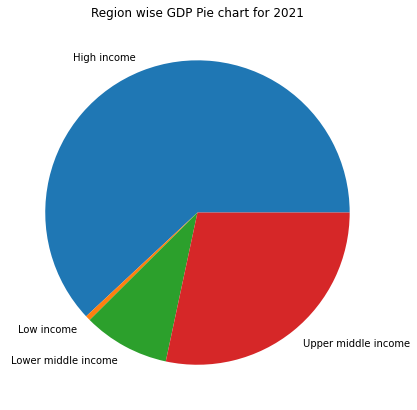

In [60]:
# Collect the data with help of a for loop region wise from grouped GDP
p=[]
label=[]
for i, j in grouped_gdp["2021"]:
    # Append labels in the empty list
    label.append(i)
    for i in grouped_gdp["2021"]:
        sum=j.sum()
        # Append the region wise sum to the empty list
    p.append(sum)
    # Print the label and the label values
print(label)
print(p)

# Create a figure for pie chart
fig = plt.figure(figsize =(10, 7))
# Refer to the lists containing the data and the labels for the pie chart
plt.pie(p, labels = label)
plt.title("Region wise GDP Pie chart for 2021")

# show plot
plt.show()

## A Stacked bar chart Region wise top ten countries by GDP share

1. To get the region wise GDP bar chart we need to work on the merged GDP data
2. We group by the region and the countries from the merge GDP data
3. Using the .max() we find the largest GDP countries
4. select the top ten largest GDP countries in the year 2021
5. Unstack and create a data frame from this data
6. plot a stacked bar chart

7. We see the highest GDP region is North America with United states having the highest GDP
8. East Asia region having China, Japan , Korea rank after North american region states
9. Followed by Europe and central asia having Germany, UK, France, Italy
10. South asia India has almost equal GDP as Germany ranking in the top ten countries

<AxesSubplot:title={'center':'Top 10 countries region wise share of GDP'}, xlabel='Region'>

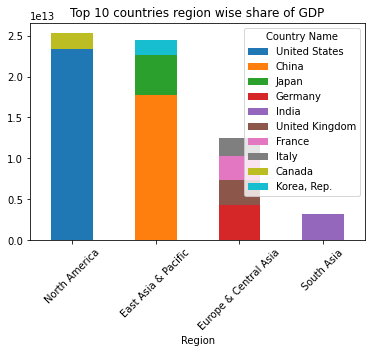

In [61]:
#Working on the merge GDP data and group by region and country
merge_gdp_data.groupby(['Region', 'Country Name']).max().nlargest(10,"2021")["2021"].unstack().plot(kind='bar',
                        stacked=True, title = "Top 10 countries region wise share of GDP",rot=45)

## 3Year GDP CAGR for each country

1. Define a parametric function which calculates the GDP CAGR for a given number of years
2. Copy of data is created to make sure the changes do not effect the original dataset
3. Set the data index as Country Name
4. Iterate through the merged GDP data set to arrive at the solution

In [62]:
# Define a paremetric function to calculate the CAGR for a given number of years

def calculate_cagr(begin_year,end_year,num_year):
    return ((end_year / begin_year) ** 1 / num_year)-1

In [63]:
#To create a copy of merged GDP data to work on it
merge_gdp_copy=merge_gdp_data.copy()
#To set the index to the Country Name
merge_gdp_copy.set_index("Country Name", inplace = True)

In [64]:
# Iterate over for loop and generate the solution in a variable cagr, then add this cagr column to the dataframe

for country_index, row in merge_gdp_copy.iterrows():
#    print(country_index)
#    print(row)
    for i in range(3,len(row)):
        val = (row.iloc[i-3:i])
#        print(val)
        for j in range(i,len(row)):
            print(j)
            begin_year = val.iloc[0]
            end_year = row.iloc[j]
            num_year=3
            cagr = calculate_cagr(begin_year,end_year,num_year)
            merge_gdp_copy.at[country_index, f'{merge_gdp_copy.columns[j]}_CAGR'] = cagr
#            print(cagr)
#            merge_gdp_copy.at[country_index,'{}_CAGR'.format(merge_gdp_copy.columns[j])]= CAGR

3


TypeError: unsupported operand type(s) for /: 'float' and 'str'

## 5Year GDP CAGR region wise weighting the population to GDP for each country



In [82]:
#merge gdp and population data
merge_gdp_pop = pd.merge(
    gdp_data,
    pop_data,
    how="left",
    on="Country Name",
    copy=True,
    indicator=False,
    validate=None,
)

In [83]:
#CAGR
#function, reshape the data,
#
df1 = merge_gdp_pop.iloc[:,1:65].drop(columns="Indicator Name_x")
df2 = merge_gdp_pop.iloc[:,66:-1].drop(columns="Indicator Name_y")
#df2
df1.mul(df2)
#df2.isna().sum()
#df2.set_index("Country Code_y").mul(df1.set_index("Country Code_x"), axis=1).reset_index()

,1960_x,1960_y,1961_x,1961_y,1962_x,1962_y,1963_x,1963_y,1964_x,1964_y,...,2018_x,2018_y,2019_x,2019_y,2020_x,2020_y,2021_x,2021_y,Country Code_x,Country Code_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
